In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Connect to the SQLite database
conn = sqlite3.connect('wildfires.sqlite')

# Create a cursor object
cursor = conn.cursor()

# Fetch the table names from the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
table_names = cursor.fetchall()

# Select the first table name
table_name = table_names[21][0]  # Assuming there is at least one table in the database

In [3]:
table_names

[('spatial_ref_sys',),
 ('spatialite_history',),
 ('sqlite_sequence',),
 ('geometry_columns',),
 ('spatial_ref_sys_aux',),
 ('views_geometry_columns',),
 ('virts_geometry_columns',),
 ('geometry_columns_statistics',),
 ('views_geometry_columns_statistics',),
 ('virts_geometry_columns_statistics',),
 ('geometry_columns_field_infos',),
 ('views_geometry_columns_field_infos',),
 ('virts_geometry_columns_field_infos',),
 ('geometry_columns_time',),
 ('geometry_columns_auth',),
 ('views_geometry_columns_auth',),
 ('virts_geometry_columns_auth',),
 ('sql_statements_log',),
 ('SpatialIndex',),
 ('ElementaryGeometries',),
 ('KNN',),
 ('Fires',),
 ('idx_Fires_Shape',),
 ('idx_Fires_Shape_node',),
 ('idx_Fires_Shape_rowid',),
 ('idx_Fires_Shape_parent',),
 ('NWCG_UnitIDActive_20170109',)]

In [4]:
# Execute a query to fetch data from the selected table
cursor.execute(f"SELECT * FROM {table_name}")

# Fetch all the results and store them as a list of tuples
data = cursor.fetchall()

# Get column names from cursor description
columns = [col[0] for col in cursor.description]

# Close the cursor and the connection
cursor.close()
conn.close()

# Create a DataFrame from the fetched data
df = pd.DataFrame(data, columns=columns)

In [5]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [6]:
df.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [7]:
df.shape

(1880465, 39)

In [8]:
df2 = df[['FOD_ID','FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'STATE', 'FIRE_NAME', 'DISCOVERY_DATE', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE', 'FIRE_SIZE']]
df2.head()

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,1.0,Lightning,2453189.5,0.10


In [9]:
df.iloc[:10].get('FOD_ID').sum()

55

In [78]:
state_gb = df2.groupby('STATE').count()
def prop(count):
    return count/df.shape[0]
state_props = state_gb['FOD_ID'].apply(prop)
state_props = pd.DataFrame(state_props).sort_values(by='FOD_ID', ascending = False)
state_props

,FOD_ID
STATE,
CA,3645.192308
GA,3247.442308
TX,2731.173077
NC,2139.942308
FL,1735.788462
SC,1563.750000
NY,1555.192308
MS,1523.653846
AZ,1376.653846


In [11]:
df2.head()

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,1.0,Lightning,2453189.5,0.10


## -  Plotting certain columns of the data against each other to find potential trends
## -  Location, cause, date of containment, duration, wildfire size, date of discovery


In [12]:
set(df2['FIRE_SIZE'])

{0.25,
 1.0,
 2.5,
 3.0,
 0.5,
 5.0,
 6.0,
 2.0,
 0.75,
 9.0,
 10.0,
 4.0,
 12.0,
 4.25,
 14.5,
 15.0,
 16.0,
 17.0,
 18.0,
 3.5,
 19.0,
 13.0,
 13.5,
 23.0,
 17.5,
 25.0,
 5.5,
 19.5,
 20.0,
 29.0,
 30.0,
 1.5,
 1.25,
 6.75,
 32.0,
 35.0,
 7.0,
 29.75,
 30.5,
 31.25,
 40.0,
 8.0,
 41.0,
 43.0,
 8.5,
 42.0,
 44.0,
 47.44,
 39.0,
 40.5,
 50.3,
 50.0,
 51.0,
 44.5,
 54.5,
 55.0,
 11.0,
 11.5,
 58.0,
 58.2,
 60.0,
 61.0,
 62.69,
 12.5,
 2.75,
 65.0,
 66.0,
 66.6,
 68.0,
 69.0,
 69.38,
 70.0,
 14.0,
 72.0,
 14.25,
 75.0,
 76.0,
 77.0,
 78.9,
 71.0,
 80.0,
 81.35,
 81.0,
 82.0,
 84.0,
 85.0,
 86.75,
 87.0,
 83.0,
 89.0,
 90.0,
 88.0,
 92.0,
 86.0,
 17.25,
 95.9,
 96.0,
 18.5,
 98.0,
 99.0,
 100.0,
 101.0,
 101.87,
 20.5,
 104.0,
 96.5,
 4.5,
 21.0,
 107.0,
 106.0,
 110.0,
 22.0,
 112.0,
 108.0,
 113.0,
 115.0,
 114.0,
 117.0,
 23.5,
 119.0,
 120.0,
 121.0,
 24.0,
 122.0,
 124.0,
 125.0,
 25.5,
 118.0,
 128.0,
 24.5,
 123.0,
 5.25,
 26.0,
 26.5,
 132.0,
 135.0,
 27.0,
 136.0,
 138.0,
 137.0,

In [13]:
set(df2['STAT_CAUSE_DESCR'])

{'Arson',
 'Campfire',
 'Children',
 'Debris Burning',
 'Equipment Use',
 'Fireworks',
 'Lightning',
 'Miscellaneous',
 'Missing/Undefined',
 'Powerline',
 'Railroad',
 'Smoking',
 'Structure'}

In [14]:
set(df2['STAT_CAUSE_CODE'])

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0}

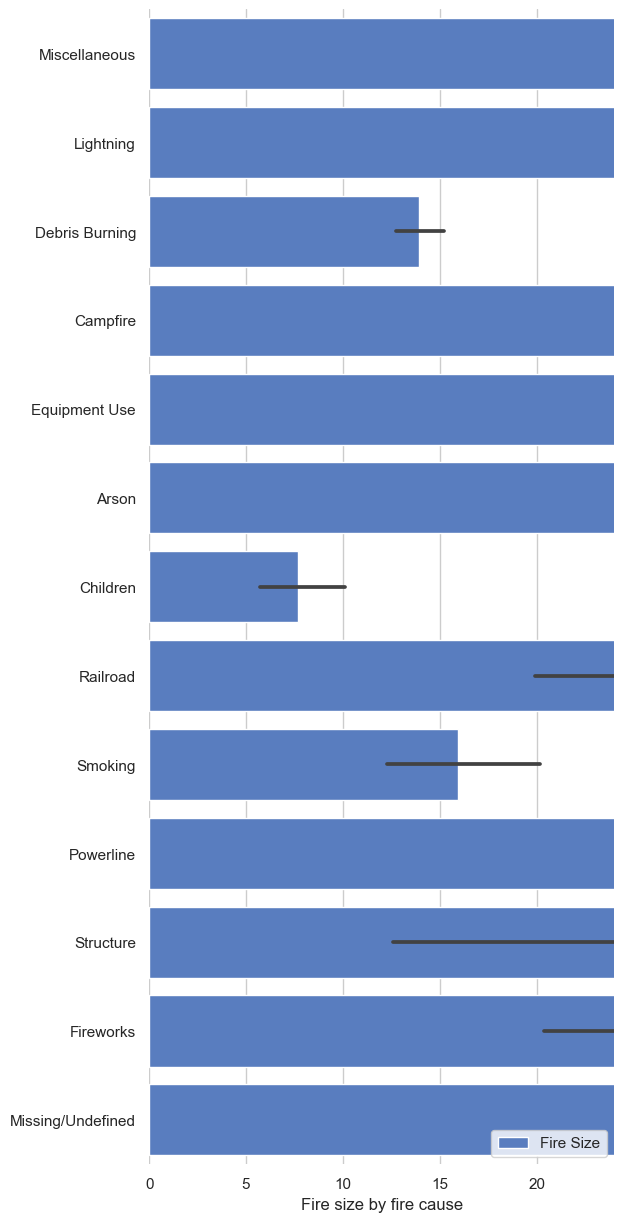

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))



# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="FIRE_SIZE", y="STAT_CAUSE_DESCR", data=df2,
            label="Fire Size", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Fire size by fire cause")
sns.despine(left=True, bottom=True)

# category the catory 

In [16]:
fire_class = sorted(set(list((df2['FIRE_SIZE_CLASS']))))

In [17]:
df2

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,1.0,Lightning,2453189.5,0.10
...,...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,A,40.481637,-122.389375,CA,ODESSA 2,2457291.5,13.0,Missing/Undefined,2457291.5,0.01
1880461,300348373,A,37.617619,-120.938570,CA,None,2457300.5,9.0,Miscellaneous,NaN,0.20
1880462,300348375,A,37.617619,-120.938570,CA,None,2457144.5,13.0,Missing/Undefined,NaN,0.10
1880463,300348377,B,37.672235,-120.898356,CA,None,2457309.5,13.0,Missing/Undefined,NaN,2.00


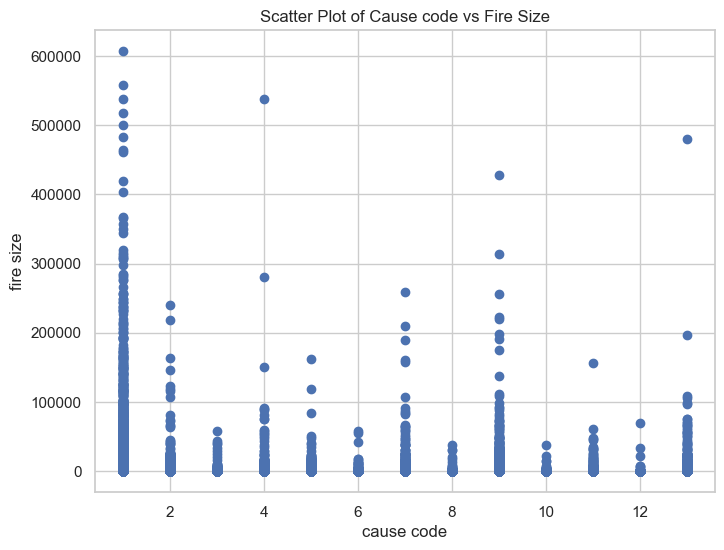

In [77]:
plt.figure(figsize=(8, 6))
plt.scatter(df2['STAT_CAUSE_CODE'], df2['FIRE_SIZE'])
plt.xlabel('cause code')
plt.ylabel('fire size')
plt.title('Scatter Plot of Cause code vs Fire Size')
plt.grid(True)
plt.show()

In [24]:
df2.head()

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,1.0,Lightning,2453189.5,0.10


In [26]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [81]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Aggregate total fire sizes by state
fire_size_by_state = df2.groupby('STATE')['FIRE_SIZE'].mean().reset_index()


In [88]:
states = pd.read_csv('states.csv')
state_props

,FOD_ID
STATE,
CA,3645.192308
GA,3247.442308
TX,2731.173077
NC,2139.942308
FL,1735.788462
SC,1563.750000
NY,1555.192308
MS,1523.653846
AZ,1376.653846


In [91]:
fire_size_df = states.merge(state_props, left_on='state', right_on='STATE', how='inner')

fire_size_df.head()

,state,latitude,longitude,FOD_ID
0,AK,63.588753,-154.493062,246.980769
1,AL,32.318231,-86.902298,1280.192308
2,AR,35.201050,-91.831833,608.903846
3,AZ,34.048928,-111.093731,1376.653846
4,CA,36.778261,-119.417932,3645.192308


In [92]:
import pandas as pd
import plotly.express as px
import json
from urllib.request import urlopen



state_abbr = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida',
    'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Add the full state name to the DataFrame for mapping
fire_size_df['state_name'] = fire_size_df['state'].map(state_abbr)

# Load USA states GeoJSON file
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    states = json.load(response)

# Create a choropleth map
fig = px.choropleth(fire_size_df, geojson=states, locations='state_name', featureidkey="properties.name", 
                    color='FOD_ID', color_continuous_scale="Viridis", scope="usa",
                    labels={'FIRE_SIZE':'Fire Size'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [103]:
df2

,FOD_ID,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIRE_NAME,DISCOVERY_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE
0,1,A,40.036944,-121.005833,CA,FOUNTAIN,2453403.5,9.0,Miscellaneous,2453403.5,0.10
1,2,A,38.933056,-120.404444,CA,PIGEON,2453137.5,1.0,Lightning,2453137.5,0.25
2,3,A,38.984167,-120.735556,CA,SLACK,2453156.5,5.0,Debris Burning,2453156.5,0.10
3,4,A,38.559167,-119.913333,CA,DEER,2453184.5,1.0,Lightning,2453189.5,0.10
4,5,A,38.559167,-119.933056,CA,STEVENOT,2453184.5,1.0,Lightning,2453189.5,0.10
...,...,...,...,...,...,...,...,...,...,...,...
1880460,300348363,A,40.481637,-122.389375,CA,ODESSA 2,2457291.5,13.0,Missing/Undefined,2457291.5,0.01
1880461,300348373,A,37.617619,-120.938570,CA,None,2457300.5,9.0,Miscellaneous,NaN,0.20
1880462,300348375,A,37.617619,-120.938570,CA,None,2457144.5,13.0,Missing/Undefined,NaN,0.10
1880463,300348377,B,37.672235,-120.898356,CA,None,2457309.5,13.0,Missing/Undefined,NaN,2.00


In [104]:
min(df2['DISCOVERY_DATE'])

2448622.5

In [108]:
df3 = df2[df2['DISCOVERY_DATE'] ==min(df2['DISCOVERY_DATE'])  ]

In [111]:
states

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '01',
   'properties': {'name': 'Alabama', 'density': 94.65},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-87.359296, 35.00118],
      [-85.606675, 34.984749],
      [-85.431413, 34.124869],
      [-85.184951, 32.859696],
      [-85.069935, 32.580372],
      [-84.960397, 32.421541],
      [-85.004212, 32.322956],
      [-84.889196, 32.262709],
      [-85.058981, 32.13674],
      [-85.053504, 32.01077],
      [-85.141136, 31.840985],
      [-85.042551, 31.539753],
      [-85.113751, 31.27686],
      [-85.004212, 31.003013],
      [-85.497137, 30.997536],
      [-87.600282, 30.997536],
      [-87.633143, 30.86609],
      [-87.408589, 30.674397],
      [-87.446927, 30.510088],
      [-87.37025, 30.427934],
      [-87.518128, 30.280057],
      [-87.655051, 30.247195],
      [-87.90699, 30.411504],
      [-87.934375, 30.657966],
      [-88.011052, 30.685351],
      [-88.10416, 30.499135],
      [-88.137022

In [112]:
df3 = df2[df2['DISCOVERY_DATE'] ==min(df2['DISCOVERY_DATE'])  ]
state_gb1 = df3.groupby('STATE').count()
def prop(count):
    return count/df.shape[0]
state_props1 = state_gb1['FOD_ID'].apply(prop)
state_props1 = pd.DataFrame(state_props1).sort_values(by='FOD_ID', ascending = False)
states = pd.read_csv('states.csv')

fire_size_df1 = states.merge(state_props1, left_on='state', right_on='STATE', how='inner')

fire_size_df1.head()

,state,latitude,longitude,FOD_ID
0,CA,36.778261,-119.417932,0.057692
1,FL,27.664827,-81.515754,0.288462
2,GA,32.157435,-82.907123,0.423077
3,MS,32.354668,-89.398528,0.307692
4,NC,35.759573,-79.019300,0.134615


In [113]:
import pandas as pd
import plotly.express as px
import json
from urllib.request import urlopen



state_abbr = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'DC': 'District of Columbia', 'FL': 'Florida',
    'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana',
    'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
    'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota',
    'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island',
    'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

# Add the full state name to the DataFrame for mapping
fire_size_df1['state_name'] = fire_size_df1['state'].map(state_abbr)

# Load USA states GeoJSON file
with urlopen('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json') as response:
    states = json.load(response)

# Create a choropleth map
fig = px.choropleth(fire_size_df1, geojson=states, locations='state_name', featureidkey="properties.name", 
                    color='FOD_ID', color_continuous_scale="Viridis", scope="usa",
                    labels={'FIRE_SIZE':'Fire Size'})

fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
